<a href="https://colab.research.google.com/github/INAENTTS/-MNIST-Digit-Classification-Using-Numpy/blob/main/Numpy_Single_Layer_MNIST_Digit_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!wget -P /content/data http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
!wget -P /content/data http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
!wget -P /content/data http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz
!wget -P /content/data http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz
!pip install idx2numpy

--2023-10-15 13:21:56--  http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 188.114.97.0, 188.114.96.0, 2a06:98c1:3121::1, ...
Connecting to yann.lecun.com (yann.lecun.com)|188.114.97.0|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9912422 (9.5M) [application/x-gzip]
Saving to: ‘/content/data/train-images-idx3-ubyte.gz’

train-images-idx3-u 100%[===================>]   9.45M  --.-KB/s    in 0.05s   

2023-10-15 13:21:57 (193 MB/s) - ‘/content/data/train-images-idx3-ubyte.gz’ saved [9912422/9912422]

--2023-10-15 13:21:57--  http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 188.114.97.0, 188.114.96.0, 2a06:98c1:3121::1, ...
Connecting to yann.lecun.com (yann.lecun.com)|188.114.97.0|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28881 (28K) [application/x-gzip]
Saving to: ‘/content/data/train-labels-idx1-ubyte.gz’

train-labels-

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import gzip
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import idx2numpy
import cv2
from google.colab.patches import cv2_imshow

In [6]:
f1 = gzip.open('/content/data/train-images-idx3-ubyte.gz')
f2 = gzip.open('/content/data/train-labels-idx1-ubyte.gz')
f3 = gzip.open('/content/data/t10k-images-idx3-ubyte.gz')
f4 = gzip.open('/content/data/t10k-labels-idx1-ubyte.gz')
data1 = idx2numpy.convert_from_file(f1)
label = idx2numpy.convert_from_file(f2)
img = data1.reshape(data1.shape[0], -1).T/255
lab = np.eye(10)[label]
lab = lab.T

In [7]:
W = np.random.randn(784,10)*0.001
b = 0

def softmax(x):
  expo = np.exp(x - x.max())
  expo = expo/np.sum(expo, keepdims = True, axis = 0)
  return expo

def d_softmax(x):
    exp_element = np.exp(x - x.max())
    exp_element = exp_element/np.sum(exp_element,axis=0)*(1-exp_element/np.sum(exp_element,axis=0))
    return exp_element


cost = 0
cost_func = []
accuracy = []

In [8]:
alpha = 0.5

In [9]:
for i in range(0,300):
  #Forward Prop
  Z = np.dot(W.T, img) + b
  A = softmax(Z)

  #Getting Output
  out = A.reshape(10,60000)
  guess = np.argmax(out, axis = 0)

  #Printing Output
  if i%10 == 0:
    print(label)
    print(guess)

  #Loss and Cost
  loss = -np.sum(lab*np.log(A + 0.000001) + (1-lab)*np.log(1-A + 0.000001), keepdims = True, axis = 0)
  cost = np.sum(loss, keepdims = True, axis = 1)/60000
  cost = float(np.squeeze(cost))
  cost_func.append(cost)
  if i%10==0:
    print(cost)

  #Getting Accuracy
  OH_out = (np.eye(10)[guess]).T
  acc = np.multiply(OH_out, lab)
  acc = np.sum(acc)/600
  accuracy.append(acc)

  if i%10 == 0:
    print(acc)

  #Backward Prop
  dZ = A - lab
  dW = np.dot(img, dZ.T)/60000
  db = np.sum(dZ, keepdims=True, axis=1)/60000
  W = W - alpha*dW
  b = b - alpha*db

[5 0 4 ... 5 6 8]
[9 9 3 ... 9 6 7]
3.251177793876991
8.505
[5 0 4 ... 5 6 8]
[5 0 4 ... 5 6 8]
1.2889737050651697
83.92666666666666
[5 0 4 ... 5 6 8]
[5 0 4 ... 5 6 8]
1.0067977813376758
86.12
[5 0 4 ... 5 6 8]
[5 0 4 ... 5 6 8]
0.8874024436091368
87.065
[5 0 4 ... 5 6 8]
[5 0 4 ... 5 6 8]
0.8183015631235144
87.71666666666667
[5 0 4 ... 5 6 8]
[5 0 4 ... 5 6 8]
0.7720921487140235
88.17166666666667
[5 0 4 ... 5 6 8]
[5 0 4 ... 5 6 8]
0.7384636243978003
88.55
[5 0 4 ... 5 6 8]
[5 0 4 ... 5 6 8]
0.7125923338981651
88.85666666666667
[5 0 4 ... 5 6 8]
[5 0 4 ... 5 6 8]
0.6918915462678021
89.07333333333334
[5 0 4 ... 5 6 8]
[5 0 4 ... 5 6 8]
0.6748369337009344
89.28
[5 0 4 ... 5 6 8]
[5 0 4 ... 5 6 8]
0.6604657973263928
89.45833333333333
[5 0 4 ... 5 6 8]
[5 0 4 ... 5 6 8]
0.648136944344591
89.60333333333334
[5 0 4 ... 5 6 8]
[5 0 4 ... 5 6 8]
0.6374049347198762
89.75833333333334
[5 0 4 ... 5 6 8]
[5 0 4 ... 5 6 8]
0.6279495319111728
89.85333333333334
[5 0 4 ... 5 6 8]
[5 0 4 ... 5 6 8]
0.6

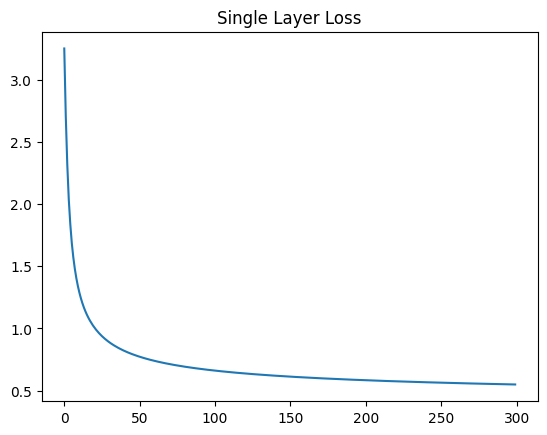

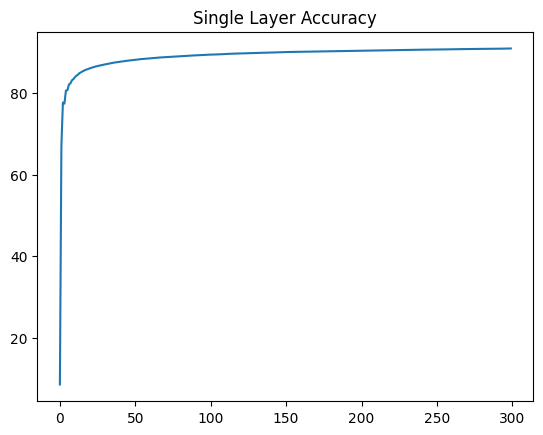

In [10]:
plt.plot(cost_func)
plt.title("Single Layer Loss")
plt.show()
plt.plot(accuracy)
plt.title("Single Layer Accuracy")
plt.show()